In [1]:
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns          
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA
from sklearn.model_selection import train_test_split  # For train/test splits

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [3]:
#Rename column names
df.columns = ["Pixel_" + str(i) for i in range(0, len(df.columns) - 1)] + ["y"]
df.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63,y
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
#Select the rows where y is 1, 3 or 6
df = df.loc[df.y.isin([1, 3, 6])]
df.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


In [5]:
#Split into train - test set
# Renames columns
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),  
    df.y, 
    test_size=0.30,
    random_state=1)

# Creates the training dataset, trn
trn = X_trn
trn["y"] = y_trn

# Creates the testing dataset, tst
tst = X_tst
tst["y"] = y_tst

# Shows the first few rows of the training data
trn.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63,y
3578,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,10,13,0,0,0,1
491,0,0,4,16,14,0,0,0,0,0,...,0,0,0,6,16,16,16,4,0,1
2231,0,0,12,10,0,0,0,0,0,3,...,3,0,0,9,16,16,16,16,9,1
590,0,0,0,6,16,3,0,0,0,0,...,0,0,0,1,8,12,15,13,1,6
1595,0,0,11,12,7,0,0,0,0,0,...,0,0,0,8,10,8,0,0,0,1


In [6]:
# LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis()

# Fit the training data
lda.fit(X_trn, y_trn)

LinearDiscriminantAnalysis()

<AxesSubplot:>

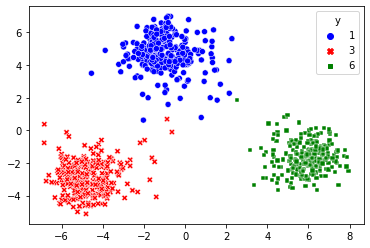

In [7]:
# Transform training data with LDA object
trn_tf = lda.transform(X_trn)

# Project the data set on the first two discriminant functions and plot
sns.scatterplot(
    x=trn_tf[:, 0], 
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['blue', 'red', 'green'])

In [8]:
print('Accuracy for training data = ' 
    + str("{:.2%}".format(lda.score(X_trn, y_trn))))

Accuracy for training data = 99.63%


<AxesSubplot:>

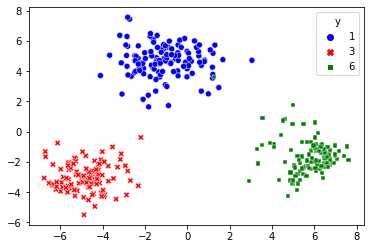

In [9]:
# Trained model to transform the test data
test_tf = lda.transform(X_tst)

# Plots the projected data set
sns.scatterplot(
    x=test_tf[:, 0], 
    y=test_tf[:, 1],
    style=y_tst,
    hue=y_tst,
    palette=['blue', 'red', 'green'])

In [10]:
print('Accuracy for testing data = ' 
    + str("{:.2%}".format(lda.score(X_tst, y_tst))))

Accuracy for testing data = 99.71%
